<a href="https://colab.research.google.com/github/15vishal/AI-ML-Projects/blob/main/Surface_defects_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths through google drive
train_dir = r'/content/drive/MyDrive/Colab Notebooks/surface defect detection/NEU Metal Surface Defects Data/train'
valid_dir = r'/content/drive/MyDrive/Colab Notebooks/surface defect detection/NEU Metal Surface Defects Data/valid'
test_dir = r'/content/drive/MyDrive/Colab Notebooks/surface defect detection/NEU Metal Surface Defects Data/test'


In [3]:

# Image parameters
img_height, img_width = 256, 256
batch_size = 32

# Data augmentation for training and rescaling for all datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test, we only rescale
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [5]:
import tensorflow as tf     #importing tensorflow
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3,InceptionResNetV2,MobileNetV2    #importing some pre-trained models from keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout      #importing some custom classifiers
from tensorflow.keras.models import Model        #importing Model library

In [6]:
# Function to create a model using a pre-trained base model
def create_model(base_model, num_classes=6):
    base_model.trainable = False  # Freeze the base model layers
    x = base_model.output         # Output of the pre-trained model
    x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)              # Adding dropout for regularization
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

In [7]:
# Dictionary of the selected 5 pre-trained models
base_models = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),
    'InceptionResNetV2': InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
}


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<ipython-input-7-d9b6557ab915>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# Number of classes in the NEU dataset
num_classes = 6

# Dictionary to store training history for each model
history_dict = {}

# Compile, train, and store the history for each model
for name, base_model in base_models.items():
    print(f"\nTraining {name} model...")

    # Create the model
    model = create_model(base_model, num_classes)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,  # Assuming you already have train_generator set up
        epochs=10,        # Adjust the number of epochs as needed
        validation_data=valid_generator
    )

    # Store the training history
    history_dict[name] = history


Training VGG16 model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 1409s 26s/step - accuracy: 0.1632 - loss: 2.1821 - val_accuracy: 0.3333 - val_loss: 1.7161
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1321s 25s/step - accuracy: 0.2026 - loss: 1.8557 - val_accuracy: 0.5694 - val_loss: 1.5705
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1342s 25s/step - accuracy: 0.2996 - loss: 1.6842 - val_accuracy: 0.6944 - val_loss: 1.4565
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1363s 26s/step - accuracy: 0.3445 - loss: 1.5568 - val_accuracy: 0.8056 - val_loss: 1.3588
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1378s 25s/step - accuracy: 0.4245 - loss: 1.4695 - val_accuracy: 0.8194 - val_loss: 1.2711
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1339s 25s/step - accuracy: 0.4805 - loss: 1.3979 - val_accuracy: 0.8611 - val_loss: 1.1960
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1344s 25s/step - accuracy: 0.5292 - loss: 1.3206 - val_accuracy: 0.8611 - val_loss: 1.1277
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1310s 25s/step - accuracy: 0.5958 - loss: 1.2561 - val_accuracy: 0.902

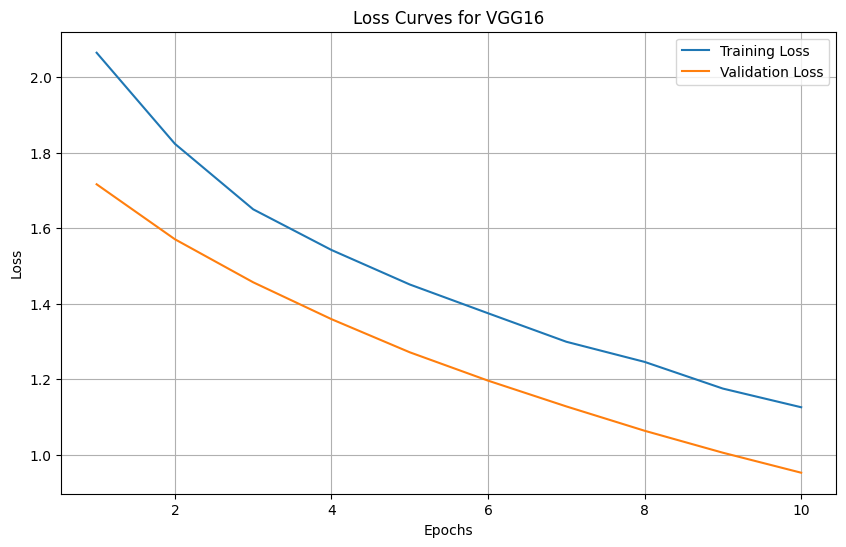

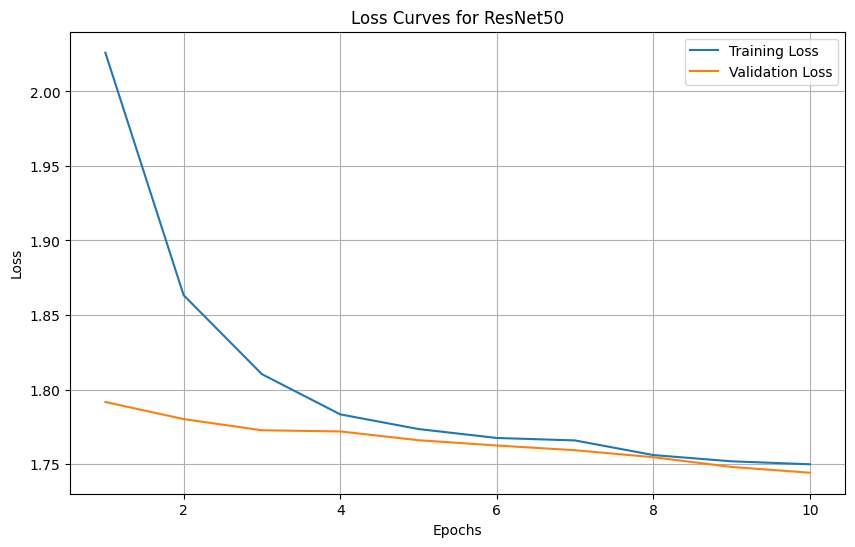

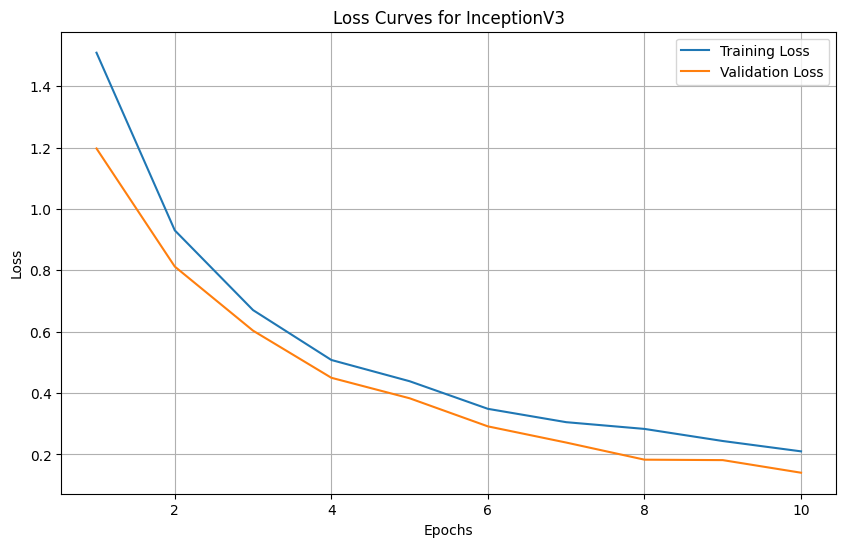

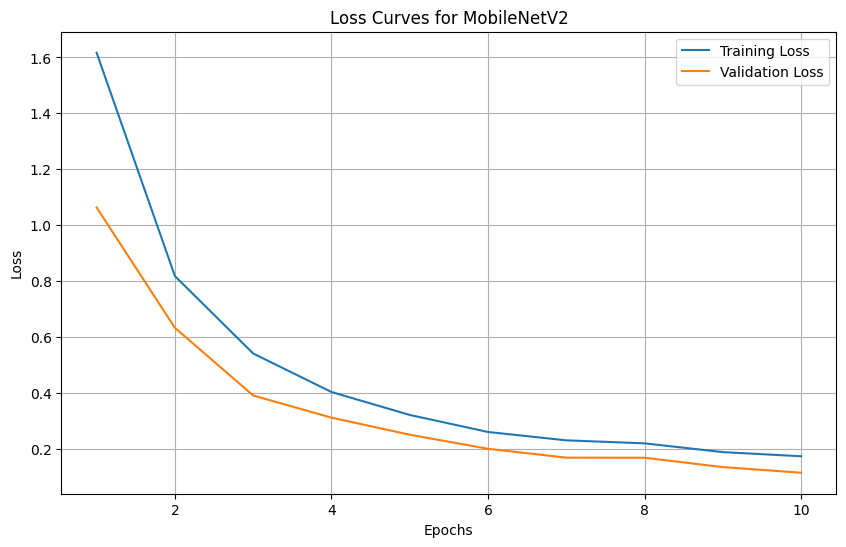

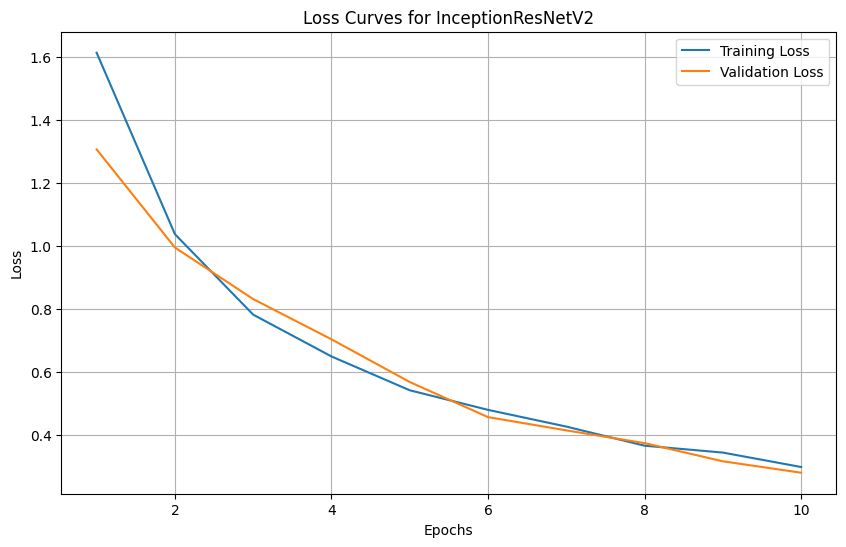

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting Loss Curves for each model
def plot_loss_curves(history_dict):
    for model_name, history in history_dict.items():
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss')
        sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss')

        plt.title(f'Loss Curves for {model_name}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

# Call the function to plot loss curves
plot_loss_curves(history_dict)

In [13]:
# models validation accuracy
for model_name, history in history_dict.items():
    val_accuracy = max(history.history['val_accuracy'])
    print(f"{model_name} Validation Accuracy: {val_accuracy*100:.2f}%")

VGG16 Validation Accuracy: 91.67%
ResNet50 Validation Accuracy: 40.28%
InceptionV3 Validation Accuracy: 98.61%
MobileNetV2 Validation Accuracy: 97.22%
InceptionResNetV2 Validation Accuracy: 94.44%
